In [4]:
#All these packages need to be installed from pip

import nltk #For POS tagging
import sklearn #For generating some matrices
import pandas as pd#For DataFrames
import numpy as np #For arrays
import matplotlib.pyplot as plt #For plotting
import seaborn #MAkes the plots look nice
import IPython.display #For displaying images
import igraph as ig

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

In [5]:
#Functions for this week
def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None, vocab = None):
    #We can use a generator here as we just need to iterate over it

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)

    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)

    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)

    #We will return a list with the stopwords removed
    if vocab is not None:
        vocab_str = '|'.join(vocab)
        workingIter = (w for w in workingIter if re.match(vocab_str, w))

    return list(workingIter)

stop_words_nltk = nltk.corpus.stopwords.words('english')
snowball = nltk.stem.snowball.SnowballStemmer('english')
wordnet = nltk.stem.WordNetLemmatizer()

def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        edges = list(zip(*np.where(coOcMat)))
        weights = coOcMat[np.where(coOcMat)]
        g = ig.Graph( n = len(wordLst),
            edges = edges,
            vertex_attrs = {'name' : wordLst, 'label' : wordLst},
            edge_attrs = {'weight' : weights}
                    )
        return g
    
def tokenize(text):
    tokenlist = nltk.word_tokenize(text)
    normalized = normlizeTokens(tokenlist, stemmer = snowball)
    return normalized

In [17]:
#df = pd.read_pickle('cmv_full_features.pkl')

In [24]:
#df = df.drop_duplicates(['sub_id'])[['sub_text', 'tokenized_sub', 'normalized_sub', 'kmeans', 'kmeans_inter']]

In [10]:
info = pd.read_pickle('cmv_cluster_info.pkl')
info

,kmeans_inter,kmeans_num,proportion
6,don think view change life time edit make beli...,6,0.290012
2,money work school time don job day think feel ...,2,0.137184
14,black white racism culture race believe ideas ...,14,0.064982
13,film funny think movie characters movies joke ...,13,0.063779
7,government law religion right human religious ...,7,0.062575
3,reddit posts meat dog downvote comments dogs e...,3,0.056558
10,men women woman man gender male female physica...,10,0.051745
5,child children abortion parents woman kid fetu...,5,0.045728
1,rape police crime crimes victims think assault...,1,0.042118
4,power word words use understand earth using wo...,4,0.042118


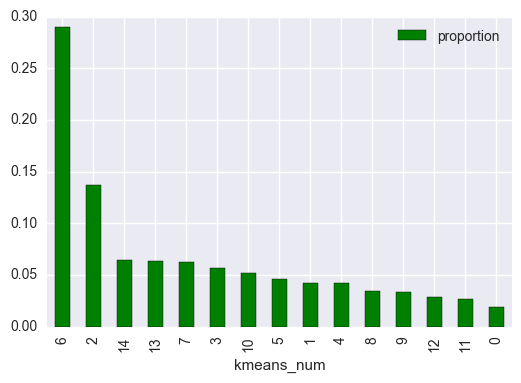

In [12]:
info.plot('kmeans_num', 'proportion', kind='bar', color='g')

# Plan
We are going to investigate cluster #6, #2, #14 respectively through semantic networks

## Cluster #6 [Think/View]
don think view change life time edit make

In [30]:
# c6_df = df[df['kmeans']==6]
# c6_df['tokenized_sents'] = c6_df['sub_text'].apply(lambda x: [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
# c6_df['normalized_sents'] = c6_df['tokenized_sents'].apply(lambda x: [normlizeTokens(s, stopwordLst = None, stemmer = snowball) for s in x])

# c6_df.shape #(241, 5)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(241, 7)

In [6]:
c6_df = pd.read_pickle('c6_df.pkl')
#c6_df[:10]

In [7]:
c6_df[:3]

,sub_text,tokenized_sub,normalized_sub,kmeans,kmeans_inter,tokenized_sents,normalized_sents
116,"I have nothing to hide. I don't break the law,...","[I, have, nothing, to, hide, ., I, do, n't, br...","[noth, hide, break, law, write, hate, particip...",6,don think view change life time edit make beli...,"[[I, have, nothing, to, hide, .], [I, do, n't,...","[[i, have, noth, to, hide], [i, do, break, the..."
362,In a lot of countries it is legal to put dista...,"[In, a, lot, of, countries, it, is, legal, to,...","[lot, countri, legal, put, distast, pictur, ci...",6,don think view change life time edit make beli...,"[[In, a, lot, of, countries, it, is, legal, to...","[[in, a, lot, of, countri, it, is, legal, to, ..."
677,**edit3: I had to delete most of my comments d...,"[**edit3, :, I, had, to, delete, most, of, my,...","[delet, comment, due, unrel, problem, view, st...",6,don think view change life time edit make beli...,"[[**edit3, :, I, had, to, delete, most, of, my...","[[i, had, to, delet, most, of, my, comment, du..."


In [8]:
TFVectorizer = sklearn.feature_extraction.text.CountVectorizer(stop_words=stop_words_nltk, tokenizer = tokenize, max_features = 200)
TFVects = TFVectorizer.fit_transform(c6_df['sub_text'])
wordsLst = TFVectorizer.get_feature_names()
TFVects.shape #(241, 200)

(241, 200)

In [9]:
A = TFVects.todense() #Get the doc-word frequency matrix.
M = np.sum(A, axis = 0) #The marginal frequencies are simplies the column sums.
W = A.T.dot(A)/np.sqrt(M.T.dot(M)) #Get out weight matrix.
np.fill_diagonal(W,0) #Set the diagonal to zero.

G = ig.Graph.Weighted_Adjacency(W.tolist(), mode=ig.ADJ_UNDIRECTED)
G.vs['name'] = wordsLst #Names are what you reference
G.vs['label'] = wordsLst #Label are what is displayed

In [ ]:
#ig.plot(G, layout = G.layout_fruchterman_reingold(), vertex_size = 0, edge_width = 0.1)

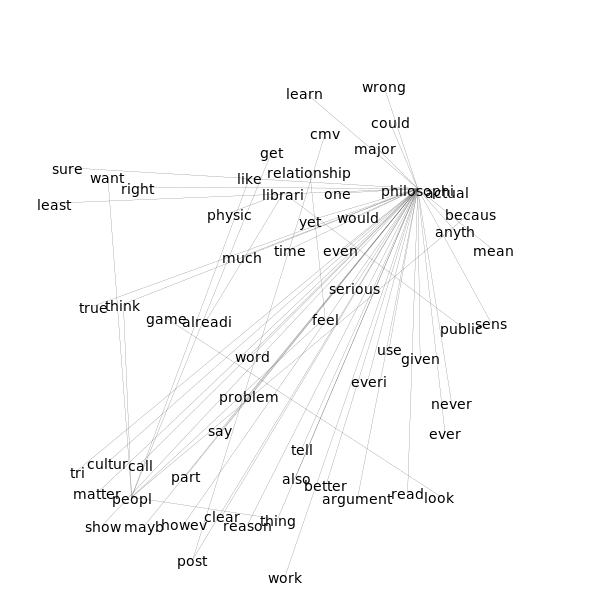

In [14]:
cutoff = 2
G_b = G.subgraph_edges(G.es.select(lambda x: x['weight'] > cutoff))
#G_b = G.subgraph_edges(G.es.select(weight_gt = cutoff))
#ig.plot(G_b, layout = G.layout_fruchterman_reingold(), vertex_size = 0, edge_width = 0.2, target ='data_cmv/G_plot.png')
#IPython.display.Image('data_cmv/G_plot.png')

### Global stats

In [43]:
G_b.largest_cliques()
for n in range(10):
    print(', '.join((G_b.vs[i]['name'] for i in G_b.largest_cliques()[n])))


want, peopl
relationship, feel
public, librari
physic, librari
philosophi, yet
philosophi, wrong
philosophi, would
philosophi, work
philosophi, word
philosophi, use


In [56]:
#Subset of our network according to the word "philosophi"
rNeighbors = G_b.neighbors('philosophi')
rNeighborsPlus1 = set(rNeighbors)
for n in rNeighbors:
    rNeighborsPlus1 |= set(G_b.neighbors(n))
    
G_r = G_b.subgraph(G_b.vs.select(rNeighborsPlus1))
G_r.vcount() #49

49

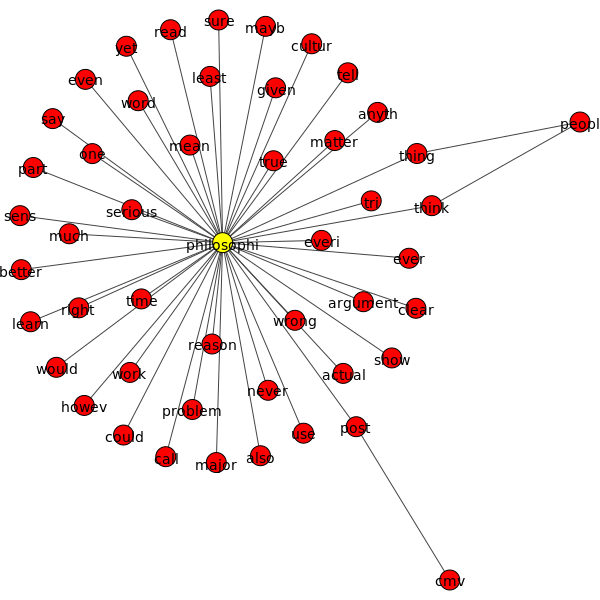

In [57]:
G_r.vs['color'] = 'red'
G_r.vs.find('philosophi')['color'] = 'yellow'
ig.plot(G_r, target = 'data_cmv/c6_philosophi.png')
IPython.display.Image('data_cmv/c6_philosophi.png')

In [61]:
#Subset of our network according to the word "philosophi"
rNeighbors = G_b.neighbors('thing')
rNeighborsPlus1 = set(rNeighbors)
for n in rNeighbors:
    rNeighborsPlus1 |= set(G_b.neighbors(n))
    
G_r = G_b.subgraph(G_b.vs.select(rNeighborsPlus1))
G_r.vcount() #49

53

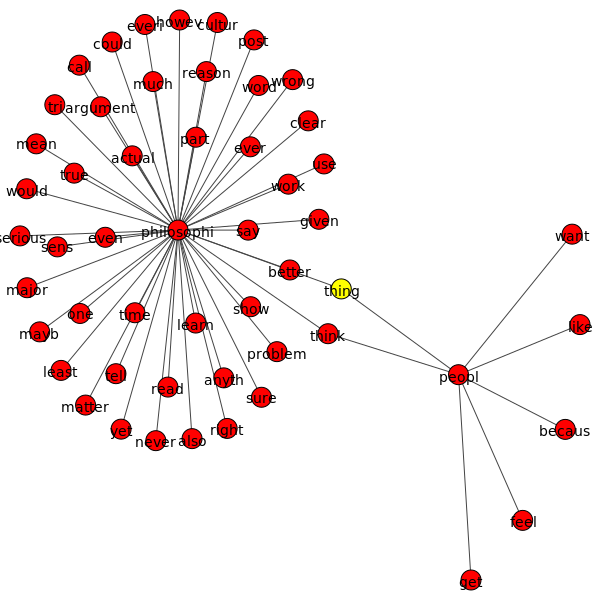

In [66]:
G_r.vs['color'] = 'red'
G_r.vs.find('thing')['color'] = 'yellow'
ig.plot(G_r, target = 'data_cmv/c6_thing.png')
IPython.display.Image('data_cmv/c6_thing.png')

In [58]:
#Subset of our network according to the word "philosophi"
rNeighbors = G_b.neighbors('peopl')
rNeighborsPlus1 = set(rNeighbors)
for n in rNeighbors:
    rNeighborsPlus1 |= set(G_b.neighbors(n))
    
G_r = G_b.subgraph(G_b.vs.select(rNeighborsPlus1))
G_r.vcount() #10

10

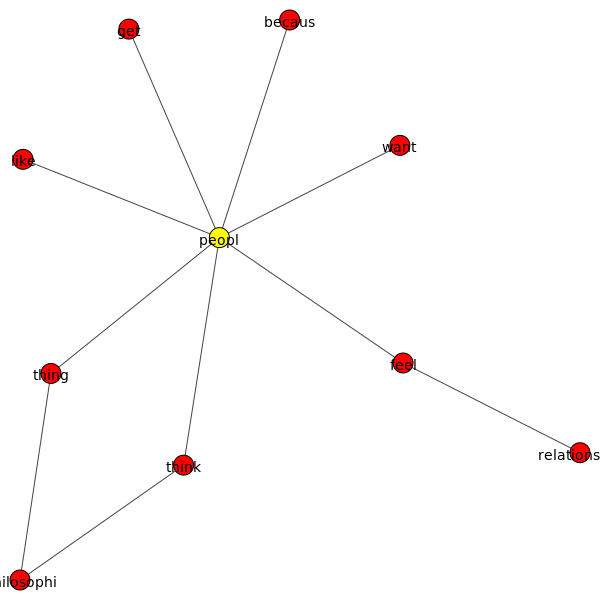

In [60]:
G_r.vs['color'] = 'red'
G_r.vs.find('peopl')['color'] = 'yellow'
ig.plot(G_r, target = 'data_cmv/c6_people.png')
IPython.display.Image('data_cmv/c6_people.png')

In [67]:
#Subset of our network according to the word "philosophi"
rNeighbors = G_b.neighbors('librari')
rNeighborsPlus1 = set(rNeighbors)
for n in rNeighbors:
    rNeighborsPlus1 |= set(G_b.neighbors(n))
    
G_r = G_b.subgraph(G_b.vs.select(rNeighborsPlus1))
G_r.vcount() #10

4

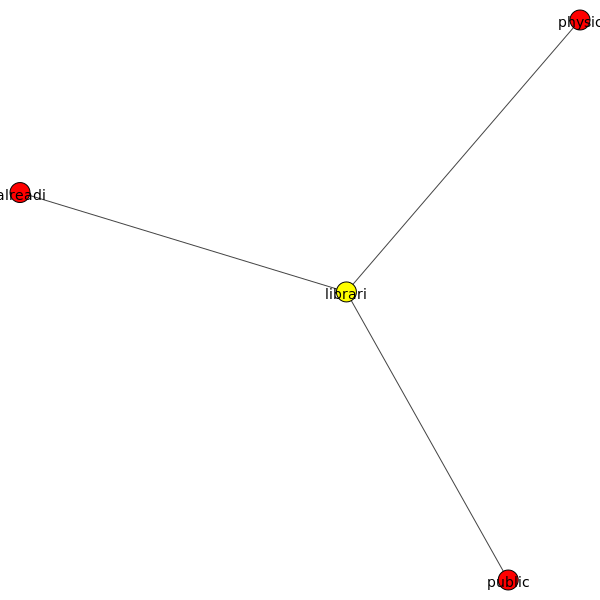

In [68]:
G_r.vs['color'] = 'red'
G_r.vs.find('librari')['color'] = 'yellow'
ig.plot(G_r, target = 'data_cmv/c6_librari.png')
IPython.display.Image('data_cmv/c6_librari.png')

### Betweeness:
Nodes that require the most shortest pathways between all other nodes in the network. Semantically, words with a high betweenness centrality may link distinctive domains, rather than being "central" to any one.


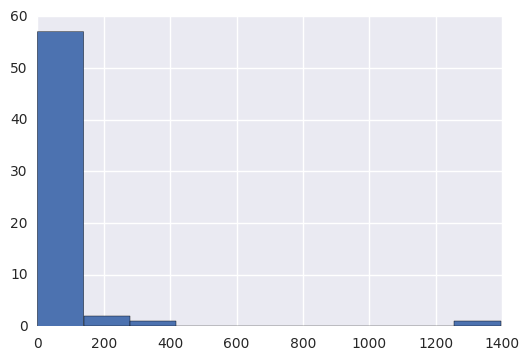

In [15]:
#Visualize the distribution of betweenness
plt.hist(G_b.betweenness())
plt.show()

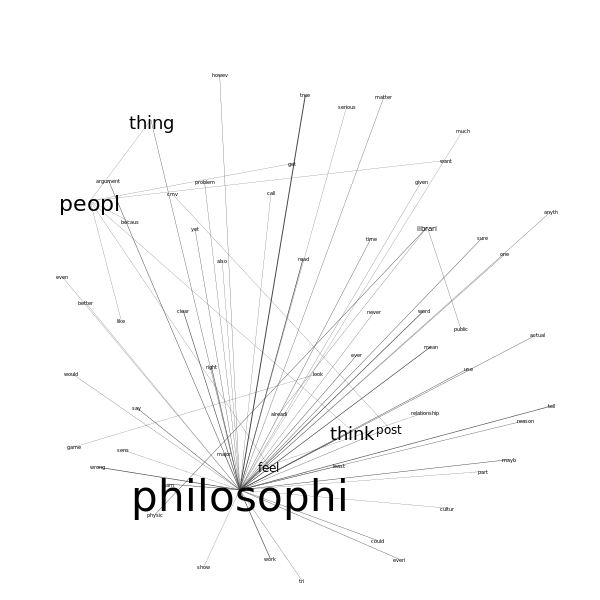

In [54]:
edge_width = (np.array(G_b.es['weight'])*0.1).tolist()
size = (5 + np.sqrt(np.array(G_b.betweenness()))).tolist()
ig.plot(G_b, layout = G.layout_fruchterman_reingold(), vertex_size = 0, vertex_label_size = size, edge_width = edge_width, target = 'data_cmv/c6_b.png')
IPython.display.Image('data_cmv/c6_b.png')

In [22]:
#What are the top ten words in terms of betweenness
sorted(zip(G_b.vs['name'], G_b.betweenness()), key = lambda x: x[1], reverse = True)[:8]

[('philosophi', 1394.5),
 ('peopl', 302.5),
 ('thing', 161.0),
 ('think', 161.0),
 ('feel', 53.0),
 ('post', 53.0),
 ('librari', 3.0),
 ('actual', 0.0)]

In [20]:
#What are words further down (the lowest all have centralities of 0
sorted(zip(G_b.vs['name'], G_b.betweenness()), key = lambda x: x[1], reverse = True)[-10:]

[('time', 0.0),
 ('tri', 0.0),
 ('true', 0.0),
 ('use', 0.0),
 ('want', 0.0),
 ('word', 0.0),
 ('work', 0.0),
 ('would', 0.0),
 ('wrong', 0.0),
 ('yet', 0.0)]

### Degree centrality: 
the number of connections possessed by each node.

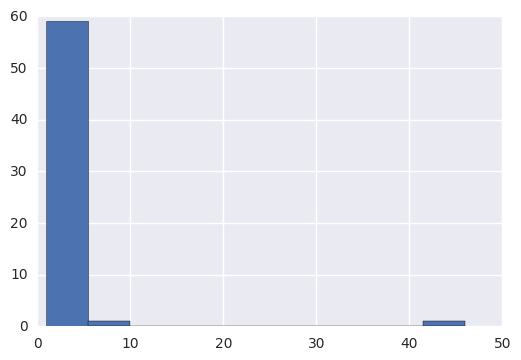

In [23]:
#Distribution of degree
plt.hist(G_b.degree())
plt.show()

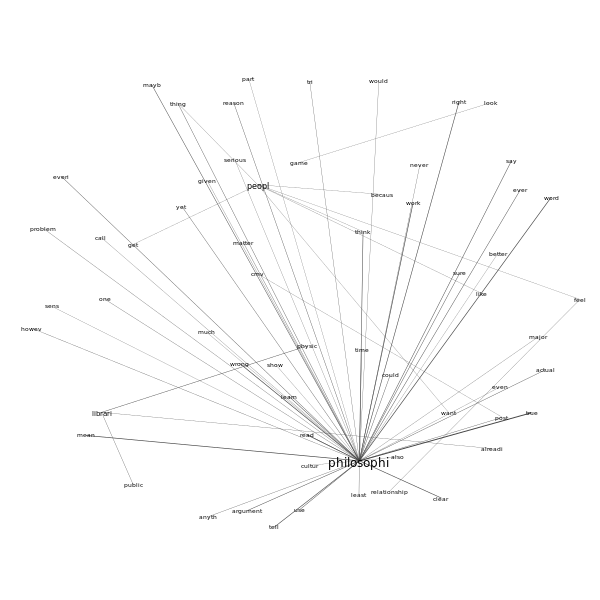

In [55]:
edge_width = (np.array(G_b.es['weight'])*0.1).tolist()
size = (5 + np.sqrt(np.array(G_b.degree()))).tolist()
ig.plot(G_b, layout = G.layout_fruchterman_reingold(), vertex_size = 0, vertex_label_size = size, edge_width = edge_width, target = 'data_cmv/c6_dc.png')
IPython.display.Image('data_cmv/c6_dc.png')

In [27]:
#Top 10 words with highest degree centrality
sorted(zip(G_b.vs['name'], G_b.degree()), key = lambda x: x[1], reverse = True)[:10]

[('philosophi', 46),
 ('peopl', 7),
 ('librari', 3),
 ('feel', 2),
 ('post', 2),
 ('thing', 2),
 ('think', 2),
 ('actual', 1),
 ('alreadi', 1),
 ('also', 1)]

In [28]:
#Bottom 10 words with lowest degree centrality
sorted(zip(G_b.vs['name'], G_b.degree()), key = lambda x: x[1], reverse = False)[:10]

[('actual', 1),
 ('alreadi', 1),
 ('also', 1),
 ('anyth', 1),
 ('argument', 1),
 ('becaus', 1),
 ('better', 1),
 ('call', 1),
 ('clear', 1),
 ('cmv', 1)]

### Closeness centrality: 
Average Euclidean or path distance between a node and all others in the network. 

A node with the highest closeness centrality is most likely to send a signal with the most coverage to the rest of the network.

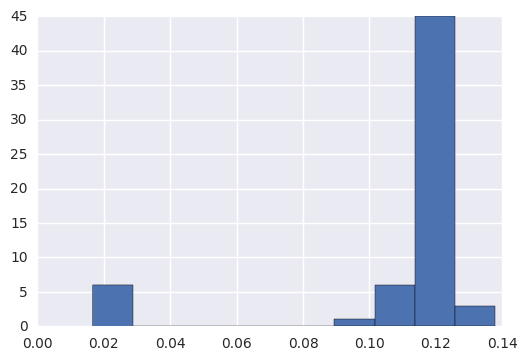

In [32]:
#Distribution of closeness
plt.hist(G_b.closeness())
plt.show()

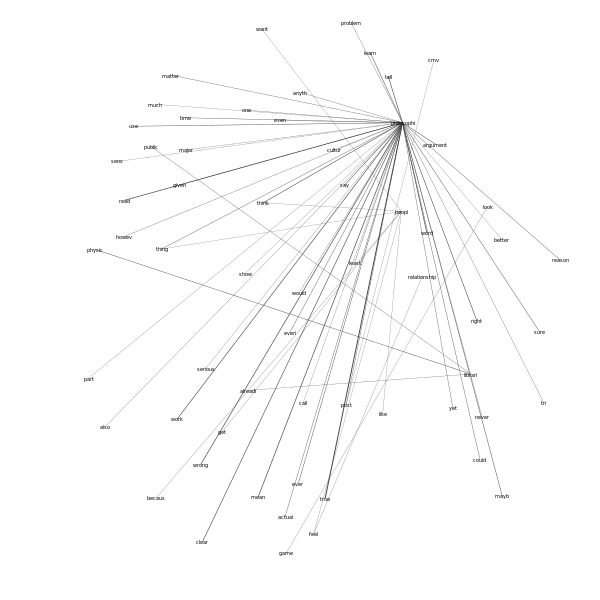

In [31]:
edge_width = (np.array(G_b.es['weight'])*0.1).tolist()
size = (5 + np.sqrt(np.array(G_b.closeness()))).tolist()
ig.plot(G_b, layout = G.layout_fruchterman_reingold(), vertex_size = 0, vertex_label_size = size, edge_width = edge_width, target = 'data_cmv/G_d.png')
IPython.display.Image('data_cmv/G_d.png')

In [29]:
#Top 10
sorted(zip(G_b.vs['name'], G_b.closeness()), key = lambda x: x[1], reverse = True)[:10]

[('philosophi', 0.13793103448275862),
 ('thing', 0.12658227848101267),
 ('think', 0.12658227848101267),
 ('post', 0.12345679012345678),
 ('actual', 0.12295081967213115),
 ('also', 0.12295081967213115),
 ('anyth', 0.12295081967213115),
 ('argument', 0.12295081967213115),
 ('better', 0.12295081967213115),
 ('call', 0.12295081967213115)]

In [30]:
#Lowest 10
sorted(zip(G_b.vs['name'], G_b.closeness()), key = lambda x: x[1], reverse = False)[:10]

[('game', 0.016666666666666666),
 ('look', 0.016666666666666666),
 ('alreadi', 0.01723147616312464),
 ('physic', 0.01723147616312464),
 ('public', 0.01723147616312464),
 ('librari', 0.017241379310344827),
 ('relationship', 0.09724473257698542),
 ('becaus', 0.10600706713780919),
 ('get', 0.10600706713780919),
 ('like', 0.10600706713780919)]

### Eigenvector centrality
weights degree by the centrality of those to whom one is tied (and the degree to whom they are tied, etc.) In short, its an $n$th order degree measure.

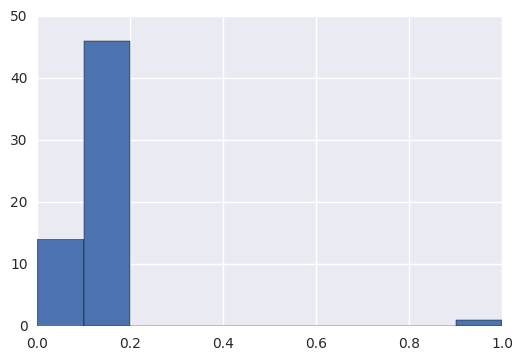

In [35]:
#Distribution of closeness
plt.hist(G_b.eigenvector_centrality())
plt.show()

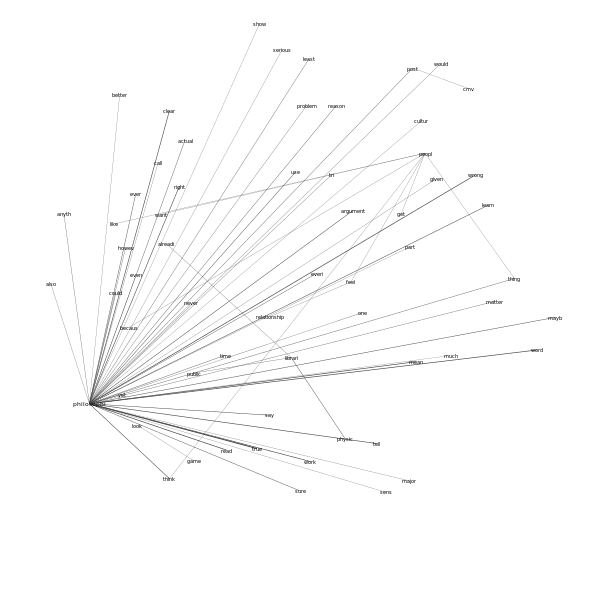

In [36]:
edge_width = (np.array(G_b.es['weight'])*0.1).tolist()
size = (5 + np.sqrt(np.array(G_b.eigenvector_centrality()))).tolist()
ig.plot(G_b, layout = G.layout_fruchterman_reingold(), vertex_size = 0, vertex_label_size = size, edge_width = edge_width, target = 'data_cmv/G_ec.png')
IPython.display.Image('data_cmv/G_ec.png')

In [33]:
#Top10
sorted(zip(G_b.vs['name'], G_b.eigenvector_centrality()), key = lambda x: x[1], reverse = True)[:10]

[('philosophi', 1.0),
 ('thing', 0.15477406595990428),
 ('think', 0.15477406595990426),
 ('post', 0.15050594180321164),
 ('clear', 0.14724290192110717),
 ('cultur', 0.14724290192110717),
 ('never', 0.14724290192110717),
 ('serious', 0.14724290192110717),
 ('ever', 0.14724290192110714),
 ('howev', 0.14724290192110714)]

In [34]:
#Lowest 10
sorted(zip(G_b.vs['name'], G_b.eigenvector_centrality()), key = lambda x: x[1], reverse = False)[:10]

[('game', 9.828318001542213e-18),
 ('physic', 1.474247700231332e-17),
 ('alreadi', 1.9656636003084426e-17),
 ('librari', 1.9656636003084426e-17),
 ('look', 1.9656636003084426e-17),
 ('public', 1.9656636003084426e-17),
 ('relationship', 0.0011334849365336641),
 ('becaus', 0.007531164038797189),
 ('get', 0.007531164038797194),
 ('like', 0.007531164038797199)]

## Cluster #2 [Personal Life]
money work school time don job day think feel

In [27]:
# c2_df = df[df['kmeans']==2]

# c2_df.shape #(114, 5)

(114, 5)

In [70]:
c2_df = pd.read_pickle('c2_df.pkl')
c2_df['tokenized_sents'] = c2_df['sub_text'].apply(lambda x: [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
c2_df['normalized_sents'] = c2_df['tokenized_sents'].apply(lambda x: [normlizeTokens(s, stopwordLst = None, stemmer = snowball) for s in x])

In [71]:
c2_df[:5]

,sub_text,tokenized_sub,normalized_sub,kmeans,kmeans_inter,tokenized_sents,normalized_sents
87,A charity here in the UK called *LGBT Youth No...,"[A, charity, here, in, the, UK, called, *LGBT,...","[chariti, uk, call, youth, north, believ, scho...",2,money work school time don job day think feel ...,"[[A, charity, here, in, the, UK, called, *LGBT...","[[a, chariti, here, in, the, uk, call, youth, ..."
756,"For as long as I can remember, the TV commerci...","[For, as, long, as, I, can, remember, ,, the, ...","[long, rememb, tv, commerci, trix, cereal, fol...",2,money work school time don job day think feel ...,"[[For, as, long, as, I, can, remember, ,, the,...","[[for, as, long, as, i, can, rememb, the, tv, ..."
809,The central problem with the idea of tipped em...,"[The, central, problem, with, the, idea, of, t...","[central, problem, idea, tip, employe, us, acc...",2,money work school time don job day think feel ...,"[[The, central, problem, with, the, idea, of, ...","[[the, central, problem, with, the, idea, of, ..."
2091,"(First post here, sorry if it breaks any rules...","[(, First, post, here, ,, sorry, if, it, break...","[first, post, sorri, break, ani, rule, incoher...",2,money work school time don job day think feel ...,"[[(, First, post, here, ,, sorry, if, it, brea...","[[first, post, here, sorri, if, it, break, ani..."
2416,"So, from my limited understanding of this, I'v...","[So, ,, from, my, limited, understanding, of, ...","[limit, understand, read, ptsd, depress, two, ...",2,money work school time don job day think feel ...,"[[So, ,, from, my, limited, understanding, of,...","[[so, from, my, limit, understand, of, this, i..."


In [72]:
#TFVectorizer = sklearn.feature_extraction.text.CountVectorizer(stop_words=stop_words_nltk, tokenizer = tokenize, max_features = 200)
TFVects = TFVectorizer.fit_transform(c2_df['sub_text'])
wordsLst = TFVectorizer.get_feature_names()
TFVects.shape #(114, 200)

(114, 200)

In [73]:
A = TFVects.todense() #Get the doc-word frequency matrix.
M = np.sum(A, axis = 0) #The marginal frequencies are simplies the column sums.
W = A.T.dot(A)/np.sqrt(M.T.dot(M)) #Get out weight matrix.
np.fill_diagonal(W,0) #Set the diagonal to zero.

G = ig.Graph.Weighted_Adjacency(W.tolist(), mode=ig.ADJ_UNDIRECTED)
G.vs['name'] = wordsLst #Names are what you reference
G.vs['label'] = wordsLst #Label are what is displayed

In [ ]:
#ig.plot(G, layout = G.layout_fruchterman_reingold(), vertex_size = 0, edge_width = 0.1)

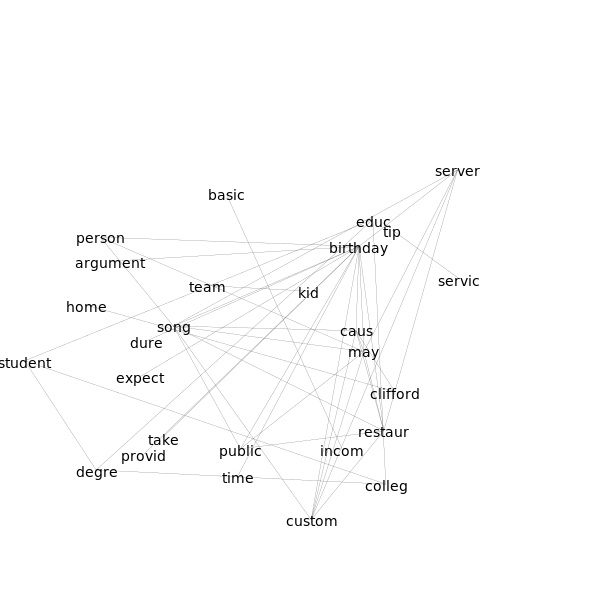

In [82]:
cutoff = 4
G_b = G.subgraph_edges(G.es.select(lambda x: x['weight'] > cutoff))
#G_b = G.subgraph_edges(G.es.select(weight_gt = cutoff))
ig.plot(G_b, layout = G.layout_fruchterman_reingold(), vertex_size = 0, edge_width = 0.2, target ='data_cmv/G_plot.png')
IPython.display.Image('data_cmv/G_plot.png')

### Global stats

In [83]:
num = len(G_b.largest_cliques())
for n in range(num):
    print(', '.join((G_b.vs[i]['name'] for i in G_b.largest_cliques()[n])))


birthday, may, song, restaur, custom, server
birthday, may, song, restaur, custom, caus


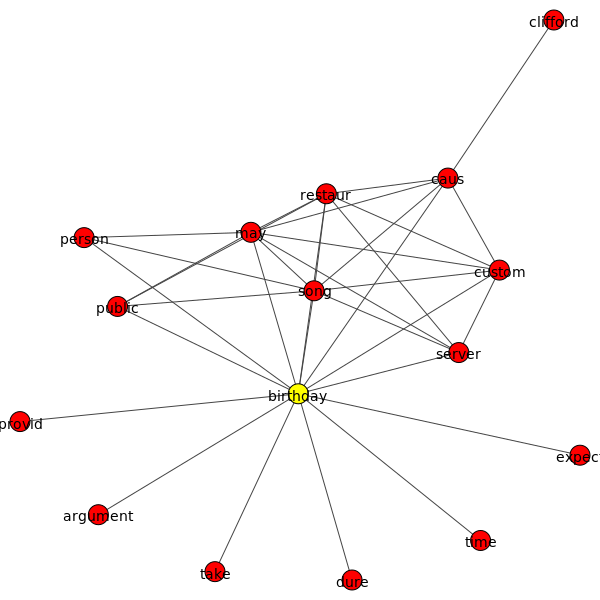

In [99]:
#Subset of our network according to the word "philosophi"
rNeighbors = G_b.neighbors('birthday')
rNeighborsPlus1 = set(rNeighbors)
for n in rNeighbors:
    rNeighborsPlus1 |= set(G_b.neighbors(n))
    
G_r = G_b.subgraph(G_b.vs.select(rNeighborsPlus1))
G_r.vcount()
G_r.vs['color'] = 'red'
G_r.vs.find('birthday')['color'] = 'yellow'
ig.plot(G_r, target = 'data_cmv/c2_birthday.png')
IPython.display.Image('data_cmv/c2_birthday.png')

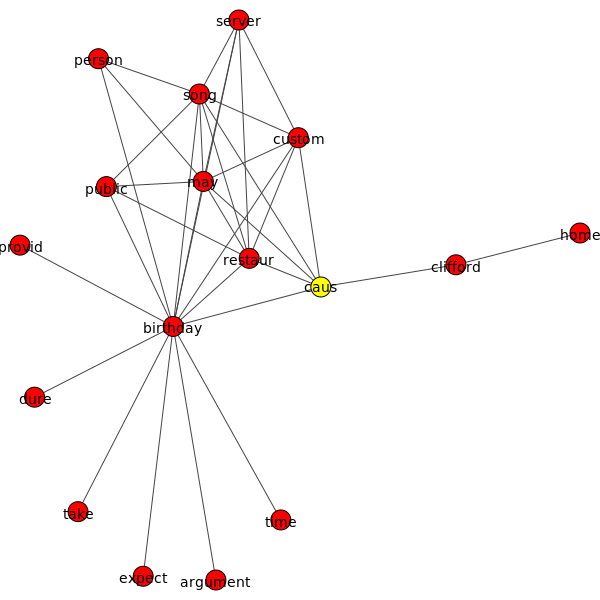

In [100]:
#Subset of our network according to the word "philosophi"
rNeighbors = G_b.neighbors('caus')
rNeighborsPlus1 = set(rNeighbors)
for n in rNeighbors:
    rNeighborsPlus1 |= set(G_b.neighbors(n))
    
G_r = G_b.subgraph(G_b.vs.select(rNeighborsPlus1))
G_r.vcount()
G_r.vs['color'] = 'red'
G_r.vs.find('caus')['color'] = 'yellow'
ig.plot(G_r, target = 'data_cmv/c2_caus.png')
IPython.display.Image('data_cmv/c2_caus.png')

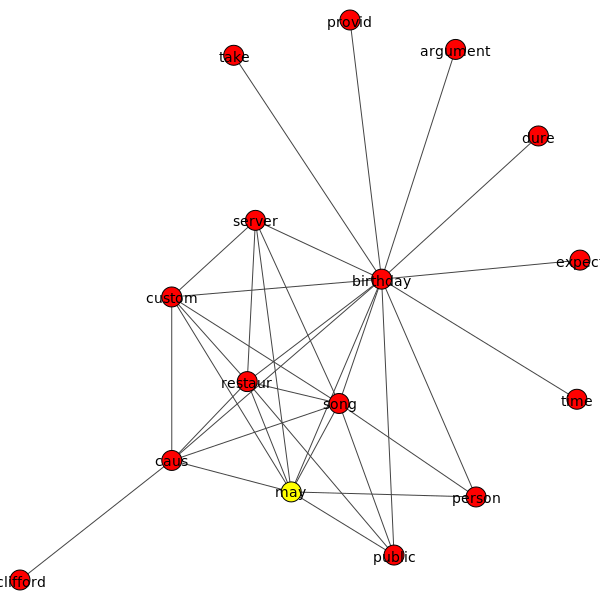

In [103]:
#Subset of our network according to the word "philosophi"
rNeighbors = G_b.neighbors('may')
rNeighborsPlus1 = set(rNeighbors)
for n in rNeighbors:
    rNeighborsPlus1 |= set(G_b.neighbors(n))
    
G_r = G_b.subgraph(G_b.vs.select(rNeighborsPlus1))
G_r.vcount()
G_r.vs['color'] = 'red'
G_r.vs.find('may')['color'] = 'yellow'
ig.plot(G_r, target = 'data_cmv/c2_may.png')
IPython.display.Image('data_cmv/c2_may.png')

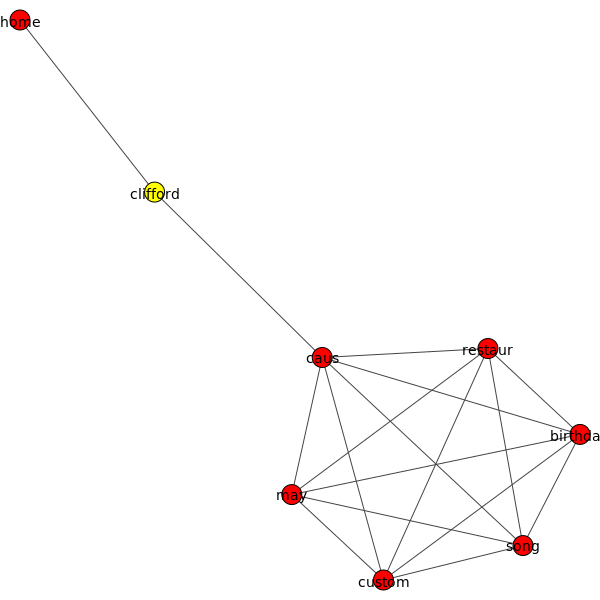

In [104]:
#Subset of our network according to the word "philosophi"
rNeighbors = G_b.neighbors('clifford')
rNeighborsPlus1 = set(rNeighbors)
for n in rNeighbors:
    rNeighborsPlus1 |= set(G_b.neighbors(n))
    
G_r = G_b.subgraph(G_b.vs.select(rNeighborsPlus1))
G_r.vcount()
G_r.vs['color'] = 'red'
G_r.vs.find('clifford')['color'] = 'yellow'
ig.plot(G_r, target = 'data_cmv/c2_clifford.png')
IPython.display.Image('data_cmv/c2_clifford.png')

### Betweeness:
Nodes that require the most shortest pathways between all other nodes in the network. Semantically, words with a high betweenness centrality may link distinctive domains, rather than being "central" to any one.


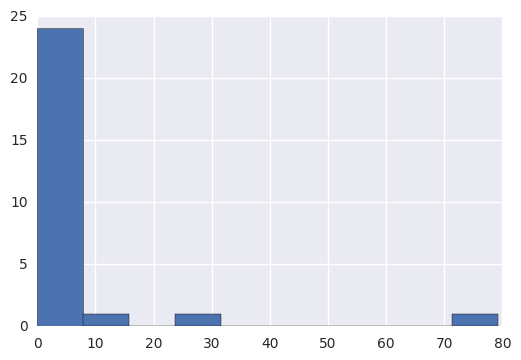

In [84]:
#Visualize the distribution of betweenness
plt.hist(G_b.betweenness())
plt.show()

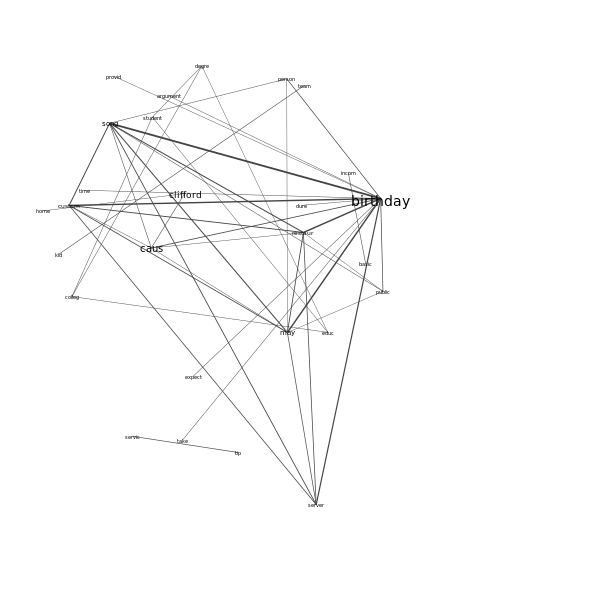

In [95]:
edge_width = (np.array(G_b.es['weight'])*0.1).tolist()
size = (5 + np.sqrt(np.array(G_b.betweenness()))).tolist()
ig.plot(G_b, layout = G.layout_fruchterman_reingold(), vertex_size = 0, vertex_label_size = size, edge_width = edge_width, target = 'data_cmv/c2_b.png')
IPython.display.Image('data_cmv/c2_b.png')

In [86]:
#What are the top ten words in terms of betweenness
sorted(zip(G_b.vs['name'], G_b.betweenness()), key = lambda x: x[1], reverse = True)[:8]

[('birthday', 79.18333333333334),
 ('caus', 28.0),
 ('clifford', 15.0),
 ('may', 4.183333333333333),
 ('song', 4.183333333333333),
 ('restaur', 1.8499999999999999),
 ('custom', 0.6000000000000001),
 ('argument', 0.0)]

In [87]:
#What are words further down (the lowest all have centralities of 0
sorted(zip(G_b.vs['name'], G_b.betweenness()), key = lambda x: x[1], reverse = True)[-10:]

[('person', 0.0),
 ('provid', 0.0),
 ('public', 0.0),
 ('server', 0.0),
 ('servic', 0.0),
 ('student', 0.0),
 ('take', 0.0),
 ('team', 0.0),
 ('time', 0.0),
 ('tip', 0.0)]

### Degree centrality: 
the number of connections possessed by each node.

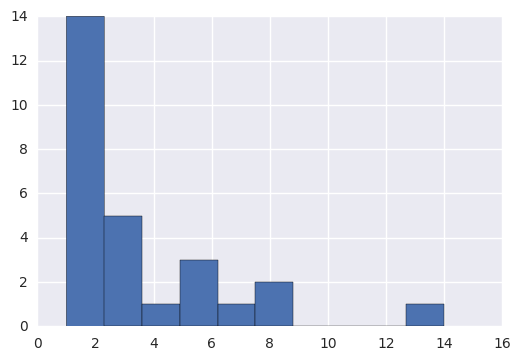

In [88]:
#Distribution of degree
plt.hist(G_b.degree())
plt.show()

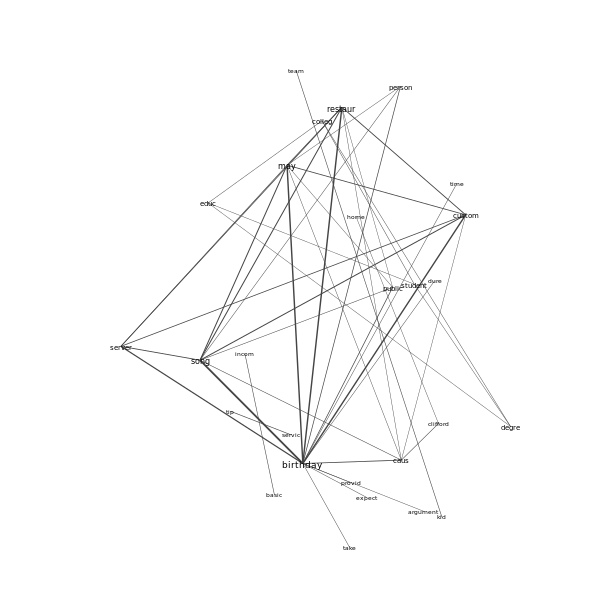

In [98]:
edge_width = (np.array(G_b.es['weight'])*0.1).tolist()
size = (5 + np.sqrt(np.array(G_b.degree()))).tolist()
ig.plot(G_b, layout = G.layout_fruchterman_reingold(), vertex_size = 0, vertex_label_size = size, edge_width = edge_width, target = 'data_cmv/c2_dc.png')
IPython.display.Image('data_cmv/c2_dc.png')

In [90]:
#Top 10 words with highest degree centrality
sorted(zip(G_b.vs['name'], G_b.degree()), key = lambda x: x[1], reverse = True)[:10]

[('birthday', 14),
 ('may', 8),
 ('song', 8),
 ('restaur', 7),
 ('caus', 6),
 ('custom', 6),
 ('server', 5),
 ('public', 4),
 ('colleg', 3),
 ('degre', 3)]

In [91]:
#Bottom 10 words with lowest degree centrality
sorted(zip(G_b.vs['name'], G_b.degree()), key = lambda x: x[1], reverse = False)[:10]

[('argument', 1),
 ('basic', 1),
 ('dure', 1),
 ('expect', 1),
 ('home', 1),
 ('incom', 1),
 ('kid', 1),
 ('provid', 1),
 ('servic', 1),
 ('take', 1)]

## Cluster #14 [Race]
black white racism culture race believe ideas

In [29]:
# c14_df = df[df['kmeans']==14]

# c14_df.shape #(54, 5)

(54, 5)

In [105]:
c14_df = pd.read_pickle('c14_df.pkl')
c14_df['tokenized_sents'] = c14_df['sub_text'].apply(lambda x: [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
c14_df['normalized_sents'] = c14_df['tokenized_sents'].apply(lambda x: [normlizeTokens(s, stopwordLst = None, stemmer = snowball) for s in x])

In [106]:
c14_df

,sub_text,tokenized_sub,normalized_sub,kmeans,kmeans_inter,tokenized_sents,normalized_sents
2390,I support Bernie and believe my life and the l...,"[I, support, Bernie, and, believe, my, life, a...","[support, berni, believ, life, live, famili, m...",14,black white racism culture race believe ideas ...,"[[I, support, Bernie, and, believe, my, life, ...","[[i, support, berni, and, believ, my, life, an..."
2634,"During the debate, Hilary Clinton mentioned th...","[During, the, debate, ,, Hilary, Clinton, ment...","[dure, debat, hilari, clinton, mention, fact, ...",14,black white racism culture race believe ideas ...,"[[During, the, debate, ,, Hilary, Clinton, men...","[[dure, the, debat, hilari, clinton, mention, ..."
3657,I don't deny that being a minority gives peopl...,"[I, do, n't, deny, that, being, a, minority, g...","[deni, minor, give, peopl, disadvantag, still,...",14,black white racism culture race believe ideas ...,"[[I, do, n't, deny, that, being, a, minority, ...","[[i, do, deni, that, be, a, minor, give, peopl..."
4050,I'm Middle Eastern but I live in Europe. I alw...,"[I, 'm, Middle, Eastern, but, I, live, in, Eur...","[middl, eastern, live, europ, alway, found, fl...",14,black white racism culture race believe ideas ...,"[[I, 'm, Middle, Eastern, but, I, live, in, Eu...","[[i, middl, eastern, but, i, live, in, europ],..."
4514,"To begin my argument, I need to make sure we a...","[To, begin, my, argument, ,, I, need, to, make...","[begin, argument, need, make, sure, use, commo...",14,black white racism culture race believe ideas ...,"[[To, begin, my, argument, ,, I, need, to, mak...","[[to, begin, my, argument, i, need, to, make, ..."
6154,**[This post is politically incorrect. This po...,"[**, [, This, post, is, politically, incorrect...","[post, polit, incorrect, post, may, thought, n...",14,black white racism culture race believe ideas ...,"[[**, [, This, post, is, politically, incorrec...","[[this, post, is, polit, incorrect], [this, po..."
6716,Disclaimer: i'm an American middle class white...,"[Disclaimer, :, i, 'm, an, American, middle, c...","[disclaim, american, middl, class, white, girl...",14,black white racism culture race believe ideas ...,"[[Disclaimer, :, i, 'm, an, American, middle, ...","[[disclaim, i, an, american, middl, class, whi..."
8589,Before I begin - I want to clarify that I do n...,"[Before, I, begin, -, I, want, to, clarify, th...","[befor, begin, want, clarifi, believ, fundamen...",14,black white racism culture race believe ideas ...,"[[Before, I, begin, -, I, want, to, clarify, t...","[[befor, i, begin, i, want, to, clarifi, that,..."
8682,I've drunk the koolaide. I'm becoming a biased...,"[I, 've, drunk, the, koolaide, ., I, 'm, becom...","[drunk, koolaid, becom, bias, partisan, hack, ...",14,black white racism culture race believe ideas ...,"[[I, 've, drunk, the, koolaide, .], [I, 'm, be...","[[i, drunk, the, koolaid], [i, becom, a, bias,..."
9667,"I am a young black male, who is torn between b...","[I, am, a, young, black, male, ,, who, is, tor...","[young, black, male, torn, side, aisl, regard,...",14,black white racism culture race believe ideas ...,"[[I, am, a, young, black, male, ,, who, is, to...","[[i, am, a, young, black, male, who, is, torn,..."


In [108]:
#TFVectorizer = sklearn.feature_extraction.text.CountVectorizer(stop_words=stop_words_nltk, tokenizer = tokenize, max_features = 200)
TFVects = TFVectorizer.fit_transform(c14_df['sub_text'])
wordsLst = TFVectorizer.get_feature_names()
TFVects.shape #(54, 200)

(54, 200)

In [109]:
A = TFVects.todense() #Get the doc-word frequency matrix.
M = np.sum(A, axis = 0) #The marginal frequencies are simplies the column sums.
W = A.T.dot(A)/np.sqrt(M.T.dot(M)) #Get out weight matrix.
np.fill_diagonal(W,0) #Set the diagonal to zero.

G = ig.Graph.Weighted_Adjacency(W.tolist(), mode=ig.ADJ_UNDIRECTED)
G.vs['name'] = wordsLst #Names are what you reference
G.vs['label'] = wordsLst #Label are what is displayed

In [ ]:
#ig.plot(G, layout = G.layout_fruchterman_reingold(), vertex_size = 0, edge_width = 0.1)

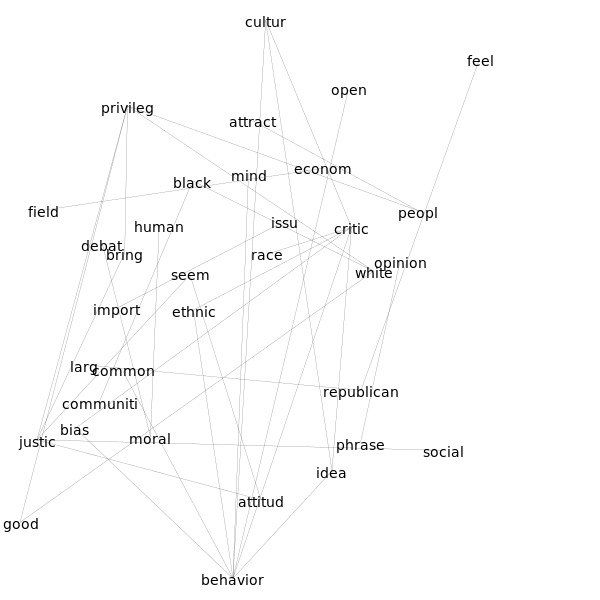

In [115]:
cutoff = 4
G_b = G.subgraph_edges(G.es.select(lambda x: x['weight'] > cutoff))
#G_b = G.subgraph_edges(G.es.select(weight_gt = cutoff))
ig.plot(G_b, layout = G.layout_fruchterman_reingold(), vertex_size = 0, edge_width = 0.2, target ='data_cmv/G_plot.png')
IPython.display.Image('data_cmv/G_plot.png')

### Global stats

In [128]:
num = len(G_b.largest_cliques())
for n in range(num):
    print(', '.join((G_b.vs[i]['name'] for i in G_b.largest_cliques()[n])))


behavior, critic, cultur, idea


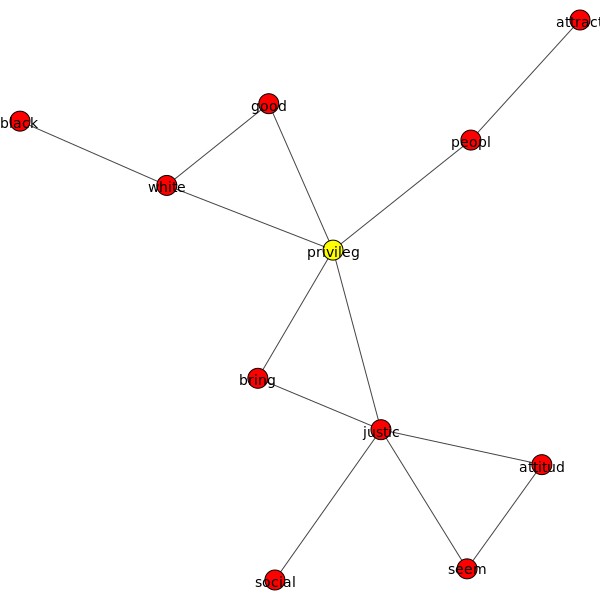

In [129]:
#Subset of our network according to the word "philosophi"
rNeighbors = G_b.neighbors('privileg')
rNeighborsPlus1 = set(rNeighbors)
for n in rNeighbors:
    rNeighborsPlus1 |= set(G_b.neighbors(n))
    
G_r = G_b.subgraph(G_b.vs.select(rNeighborsPlus1))
G_r.vcount()
G_r.vs['color'] = 'red'
G_r.vs.find('privileg')['color'] = 'yellow'
ig.plot(G_r, target = 'data_cmv/c2_privileg.png')
IPython.display.Image('data_cmv/c2_privileg.png')

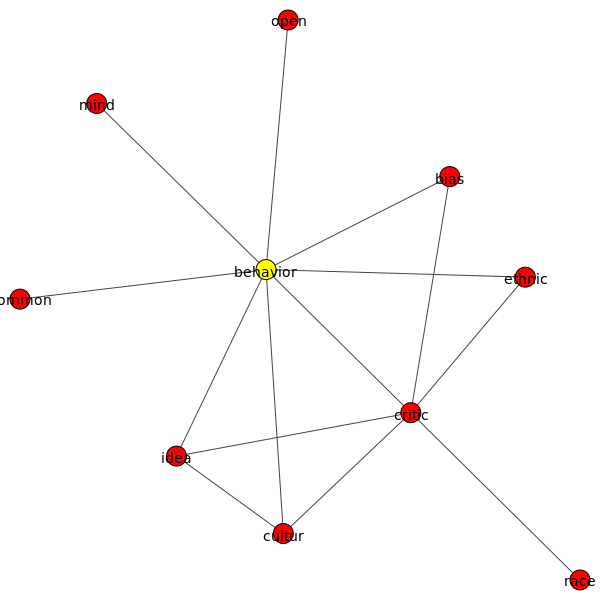

In [131]:
#Subset of our network according to the word "philosophi"
rNeighbors = G_b.neighbors('behavior')
rNeighborsPlus1 = set(rNeighbors)
for n in rNeighbors:
    rNeighborsPlus1 |= set(G_b.neighbors(n))
    
G_r = G_b.subgraph(G_b.vs.select(rNeighborsPlus1))
G_r.vcount()
G_r.vs['color'] = 'red'
G_r.vs.find('behavior')['color'] = 'yellow'
ig.plot(G_r, target = 'data_cmv/c2_behavior.png')
IPython.display.Image('data_cmv/c2_behavior.png')

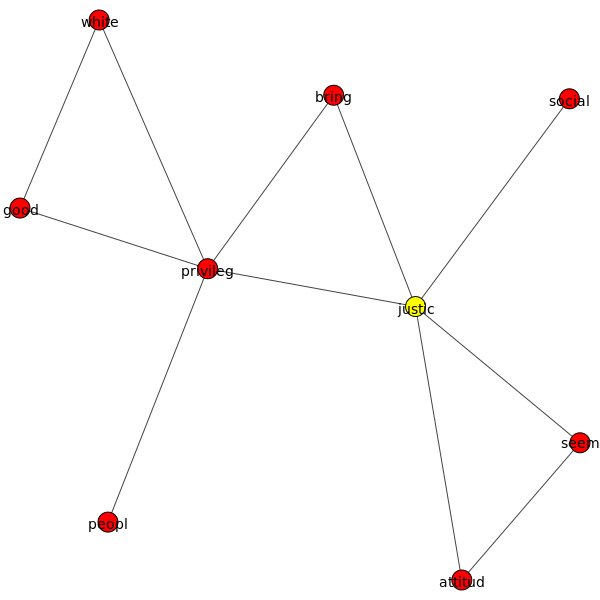

In [132]:
#Subset of our network according to the word "philosophi"
rNeighbors = G_b.neighbors('justic')
rNeighborsPlus1 = set(rNeighbors)
for n in rNeighbors:
    rNeighborsPlus1 |= set(G_b.neighbors(n))
    
G_r = G_b.subgraph(G_b.vs.select(rNeighborsPlus1))
G_r.vcount()
G_r.vs['color'] = 'red'
G_r.vs.find('justic')['color'] = 'yellow'
ig.plot(G_r, target = 'data_cmv/c2_justic.png')
IPython.display.Image('data_cmv/c2_justic.png')

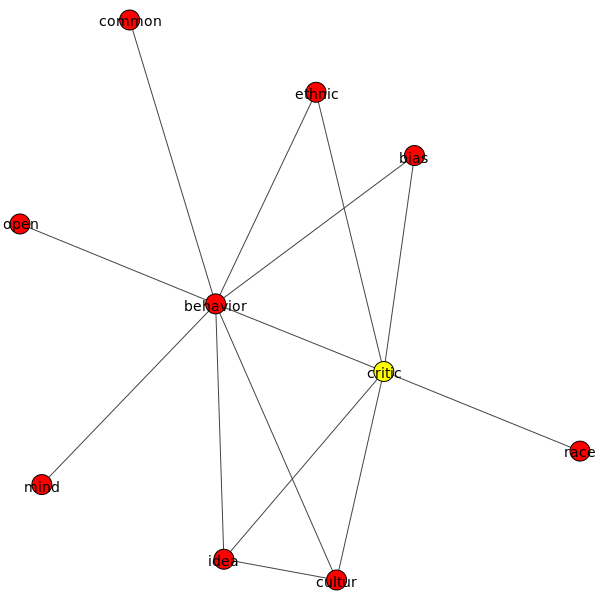

In [133]:
#Subset of our network according to the word "philosophi"
rNeighbors = G_b.neighbors('critic')
rNeighborsPlus1 = set(rNeighbors)
for n in rNeighbors:
    rNeighborsPlus1 |= set(G_b.neighbors(n))
    
G_r = G_b.subgraph(G_b.vs.select(rNeighborsPlus1))
G_r.vcount()
G_r.vs['color'] = 'red'
G_r.vs.find('critic')['color'] = 'yellow'
ig.plot(G_r, target = 'data_cmv/c2_critic.png')
IPython.display.Image('data_cmv/c2_critic.png')

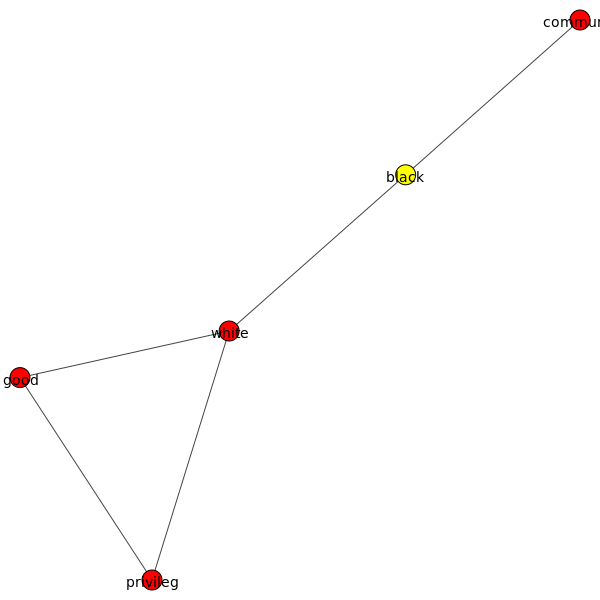

In [134]:
#Subset of our network according to the word "philosophi"
rNeighbors = G_b.neighbors('black')
rNeighborsPlus1 = set(rNeighbors)
for n in rNeighbors:
    rNeighborsPlus1 |= set(G_b.neighbors(n))
    
G_r = G_b.subgraph(G_b.vs.select(rNeighborsPlus1))
G_r.vcount()
G_r.vs['color'] = 'red'
G_r.vs.find('black')['color'] = 'yellow'
ig.plot(G_r, target = 'data_cmv/c2_black.png')
IPython.display.Image('data_cmv/c2_black.png')

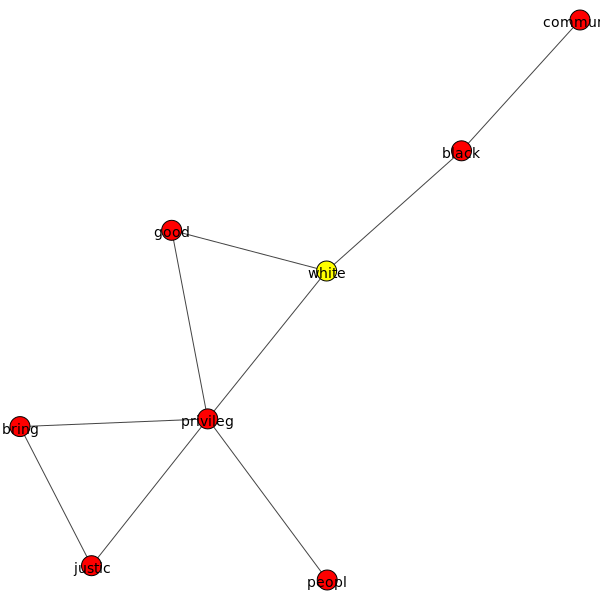

In [135]:
#Subset of our network according to the word "philosophi"
rNeighbors = G_b.neighbors('white')
rNeighborsPlus1 = set(rNeighbors)
for n in rNeighbors:
    rNeighborsPlus1 |= set(G_b.neighbors(n))
    
G_r = G_b.subgraph(G_b.vs.select(rNeighborsPlus1))
G_r.vcount()
G_r.vs['color'] = 'red'
G_r.vs.find('white')['color'] = 'yellow'
ig.plot(G_r, target = 'data_cmv/c2_white.png')
IPython.display.Image('data_cmv/c2_white.png')

### Betweeness:
Nodes that require the most shortest pathways between all other nodes in the network. Semantically, words with a high betweenness centrality may link distinctive domains, rather than being "central" to any one.


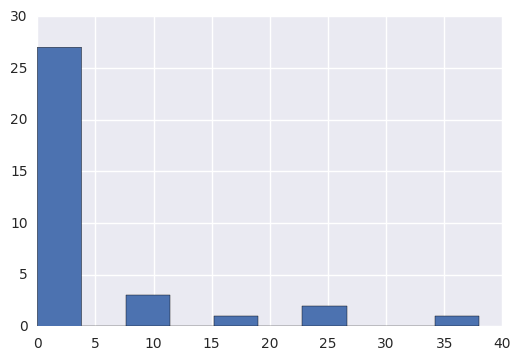

In [112]:
#Visualize the distribution of betweenness
plt.hist(G_b.betweenness())
plt.show()

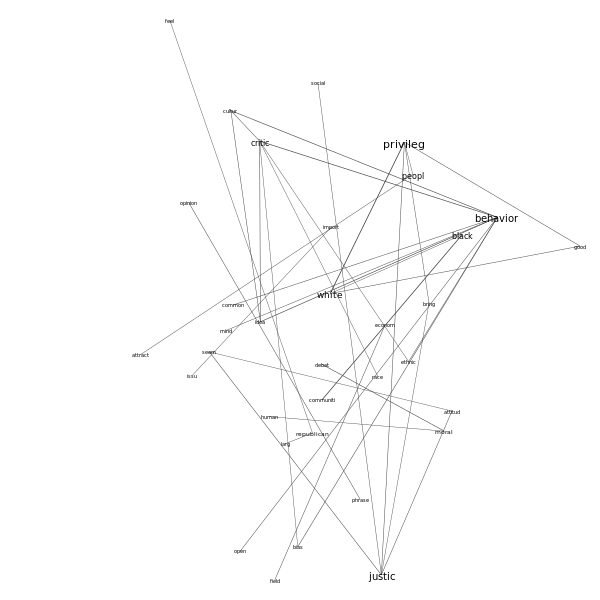

In [121]:
edge_width = (np.array(G_b.es['weight'])*0.1).tolist()
size = (5 + np.sqrt(np.array(G_b.betweenness()))).tolist()
ig.plot(G_b, layout = G.layout_fruchterman_reingold(), vertex_size = 0, vertex_label_size = size, edge_width = edge_width, target = 'data_cmv/c14_b.png')
IPython.display.Image('data_cmv/c14_b.png')

In [116]:
#What are the top ten words in terms of betweenness
sorted(zip(G_b.vs['name'], G_b.betweenness()), key = lambda x: x[1], reverse = True)[:8]

[('privileg', 38.0),
 ('justic', 26.0),
 ('behavior', 23.5),
 ('white', 18.0),
 ('critic', 10.5),
 ('black', 10.0),
 ('peopl', 10.0),
 ('moral', 1.0)]

In [117]:
#What are words further down (the lowest all have centralities of 0
sorted(zip(G_b.vs['name'], G_b.betweenness()), key = lambda x: x[1], reverse = True)[-10:]

[('import', 0.0),
 ('issu', 0.0),
 ('larg', 0.0),
 ('mind', 0.0),
 ('open', 0.0),
 ('opinion', 0.0),
 ('phrase', 0.0),
 ('race', 0.0),
 ('seem', 0.0),
 ('social', 0.0)]

### Degree centrality: 
the number of connections possessed by each node.

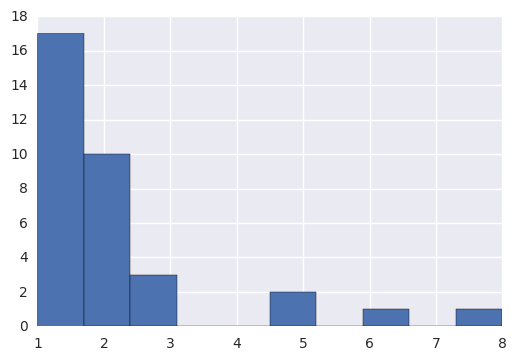

In [122]:
#Distribution of degree
plt.hist(G_b.degree())
plt.show()

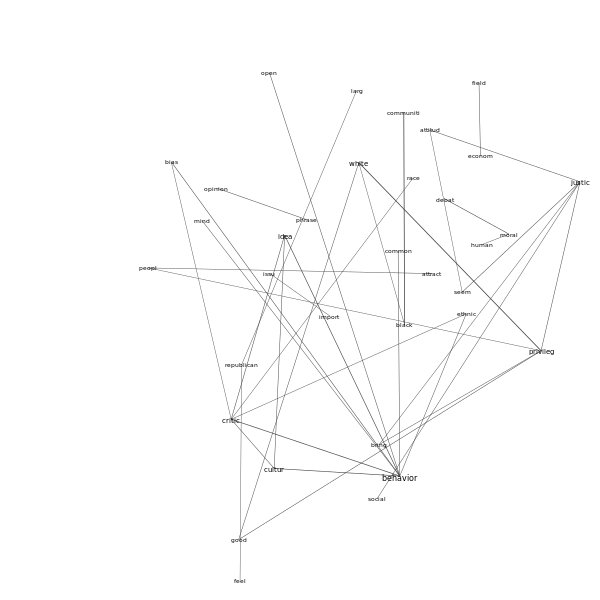

In [125]:
edge_width = (np.array(G_b.es['weight'])*0.1).tolist()
size = (5 + np.sqrt(np.array(G_b.degree()))).tolist()
ig.plot(G_b, layout = G.layout_fruchterman_reingold(), vertex_size = 0, vertex_label_size = size, edge_width = edge_width, target = 'data_cmv/c14_dc.png')
IPython.display.Image('data_cmv/c14_dc.png')

In [126]:
#Top 10 words with highest degree centrality
sorted(zip(G_b.vs['name'], G_b.degree()), key = lambda x: x[1], reverse = True)[:10]

[('behavior', 8),
 ('critic', 6),
 ('justic', 5),
 ('privileg', 5),
 ('cultur', 3),
 ('idea', 3),
 ('white', 3),
 ('attitud', 2),
 ('bias', 2),
 ('black', 2)]

In [127]:
#Bottom 10 words with lowest degree centrality
sorted(zip(G_b.vs['name'], G_b.degree()), key = lambda x: x[1], reverse = False)[:10]

[('attract', 1),
 ('common', 1),
 ('communiti', 1),
 ('debat', 1),
 ('econom', 1),
 ('feel', 1),
 ('field', 1),
 ('human', 1),
 ('import', 1),
 ('issu', 1)]

## Cluster #13 []
film funny think movie characters movies joke

In [29]:
# c13_df = df[df['kmeans']==13]

# c13_df.shape #(54, 5)

(54, 5)

In [136]:
c13_df = pd.read_pickle('c13_df.pkl')
c13_df['tokenized_sents'] = c13_df['sub_text'].apply(lambda x: [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
c13_df['normalized_sents'] = c13_df['tokenized_sents'].apply(lambda x: [normlizeTokens(s, stopwordLst = None, stemmer = snowball) for s in x])

In [137]:
c13_df[:3]

,sub_text,tokenized_sub,normalized_sub,kmeans,kmeans_inter,tokenized_sents,normalized_sents
717,\n\nLately I've noticed that most horror movie...,"[Lately, I, 've, noticed, that, most, horror, ...","[late, notic, horror, movi, reli, jump, scare,...",13,film funny think movie characters movies joke ...,"[[Lately, I, 've, noticed, that, most, horror,...","[[late, i, notic, that, most, horror, movi, re..."
2451,It's my view that people that drive motorcylce...,"[It, 's, my, view, that, people, that, drive, ...","[view, peopl, drive, motorcylc, car, loud, muf...",13,film funny think movie characters movies joke ...,"[[It, 's, my, view, that, people, that, drive,...","[[it, my, view, that, peopl, that, drive, moto..."
3291,I think the way we think of soldiers in the UK...,"[I, think, the, way, we, think, of, soldiers, ...","[think, way, think, soldier, uk, live, us, ill...",13,film funny think movie characters movies joke ...,"[[I, think, the, way, we, think, of, soldiers,...","[[i, think, the, way, we, think, of, soldier, ..."


In [139]:
#TFVectorizer = sklearn.feature_extraction.text.CountVectorizer(stop_words=stop_words_nltk, tokenizer = tokenize, max_features = 200)
TFVects = TFVectorizer.fit_transform(c13_df['sub_text'])
wordsLst = TFVectorizer.get_feature_names()
TFVects.shape #(53, 200)

(53, 200)

In [140]:
A = TFVects.todense() #Get the doc-word frequency matrix.
M = np.sum(A, axis = 0) #The marginal frequencies are simplies the column sums.
W = A.T.dot(A)/np.sqrt(M.T.dot(M)) #Get out weight matrix.
np.fill_diagonal(W,0) #Set the diagonal to zero.

G = ig.Graph.Weighted_Adjacency(W.tolist(), mode=ig.ADJ_UNDIRECTED)
G.vs['name'] = wordsLst #Names are what you reference
G.vs['label'] = wordsLst #Label are what is displayed

In [ ]:
#ig.plot(G, layout = G.layout_fruchterman_reingold(), vertex_size = 0, edge_width = 0.1)

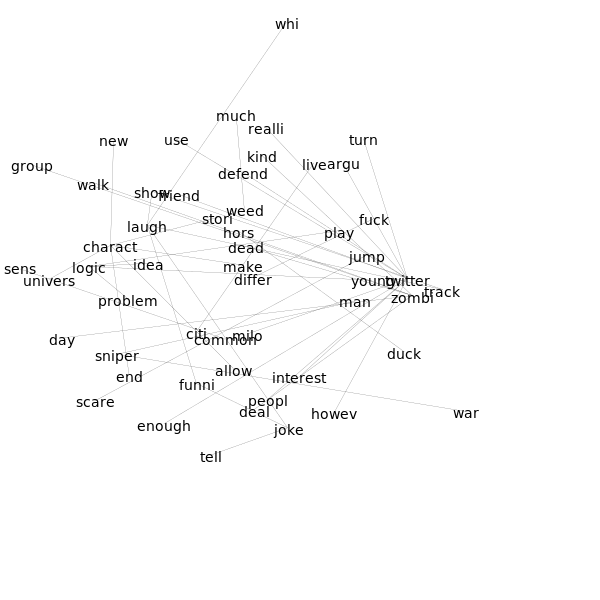

In [146]:
cutoff = 3
G_b = G.subgraph_edges(G.es.select(lambda x: x['weight'] > cutoff))
#G_b = G.subgraph_edges(G.es.select(weight_gt = cutoff))
ig.plot(G_b, layout = G.layout_fruchterman_reingold(), vertex_size = 0, edge_width = 0.2, target ='data_cmv/G_plot.png')
IPython.display.Image('data_cmv/G_plot.png')

### Global stats

In [147]:
num = len(G_b.largest_cliques())
for n in range(num):
    print(', '.join((G_b.vs[i]['name'] for i in G_b.largest_cliques()[n])))


track, laugh, show
laugh, funni, joke


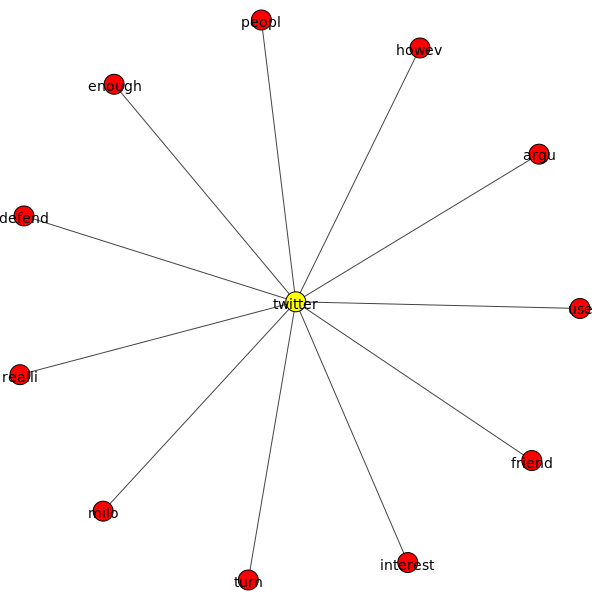

In [156]:
#Subset of our network according to the word "philosophi"
rNeighbors = G_b.neighbors('twitter')
rNeighborsPlus1 = set(rNeighbors)
for n in rNeighbors:
    rNeighborsPlus1 |= set(G_b.neighbors(n))
    
G_r = G_b.subgraph(G_b.vs.select(rNeighborsPlus1))
G_r.vcount()
G_r.vs['color'] = 'red'
G_r.vs.find('twitter')['color'] = 'yellow'
ig.plot(G_r, target = 'data_cmv/c13_twitter.png')
IPython.display.Image('data_cmv/c13_twitter.png')

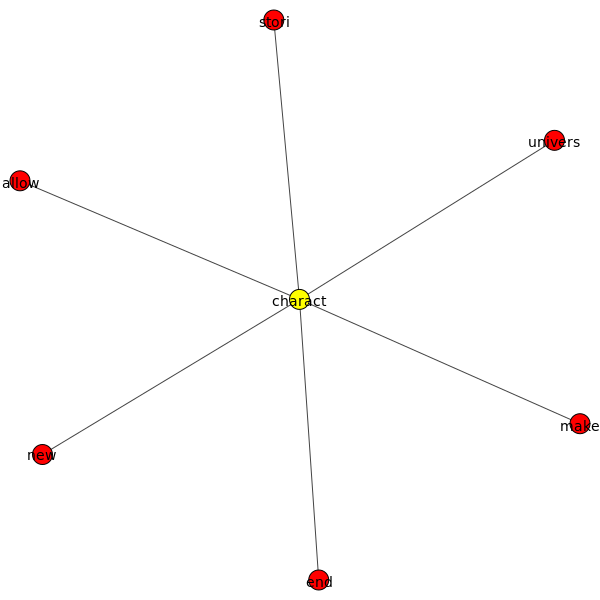

In [157]:
#Subset of our network according to the word "philosophi"
rNeighbors = G_b.neighbors('charact')
rNeighborsPlus1 = set(rNeighbors)
for n in rNeighbors:
    rNeighborsPlus1 |= set(G_b.neighbors(n))
    
G_r = G_b.subgraph(G_b.vs.select(rNeighborsPlus1))
G_r.vcount()
G_r.vs['color'] = 'red'
G_r.vs.find('charact')['color'] = 'yellow'
ig.plot(G_r, target = 'data_cmv/c13_charact.png')
IPython.display.Image('data_cmv/c13_charact.png')

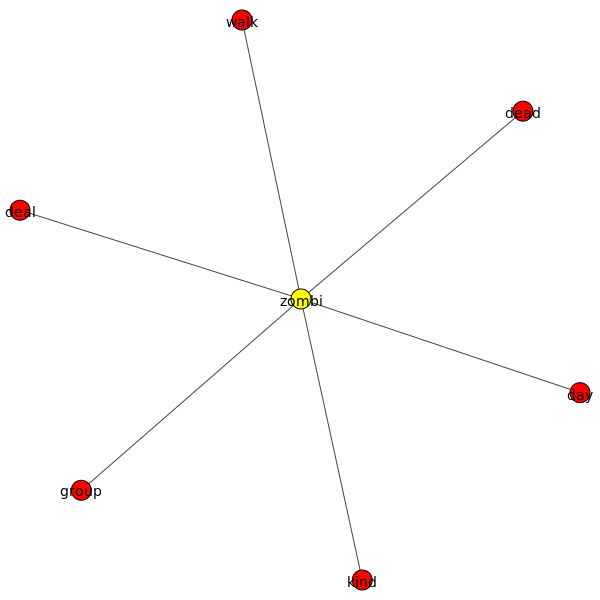

In [160]:
#Subset of our network according to the word "philosophi"
rNeighbors = G_b.neighbors('zombi')
rNeighborsPlus1 = set(rNeighbors)
for n in rNeighbors:
    rNeighborsPlus1 |= set(G_b.neighbors(n))
    
G_r = G_b.subgraph(G_b.vs.select(rNeighborsPlus1))
G_r.vcount()
G_r.vs['color'] = 'red'
G_r.vs.find('zombi')['color'] = 'yellow'
ig.plot(G_r, target = 'data_cmv/c13_zombi.png')
IPython.display.Image('data_cmv/c13_zombi.png')

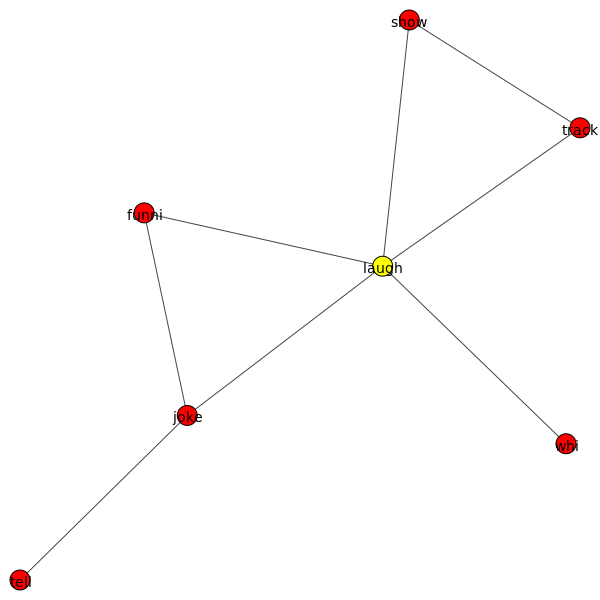

In [161]:
#Subset of our network according to the word "philosophi"
rNeighbors = G_b.neighbors('laugh')
rNeighborsPlus1 = set(rNeighbors)
for n in rNeighbors:
    rNeighborsPlus1 |= set(G_b.neighbors(n))
    
G_r = G_b.subgraph(G_b.vs.select(rNeighborsPlus1))
G_r.vcount()
G_r.vs['color'] = 'red'
G_r.vs.find('laugh')['color'] = 'yellow'
ig.plot(G_r, target = 'data_cmv/c13_laugh.png')
IPython.display.Image('data_cmv/c13_laugh.png')

### Betweeness:
Nodes that require the most shortest pathways between all other nodes in the network. Semantically, words with a high betweenness centrality may link distinctive domains, rather than being "central" to any one.


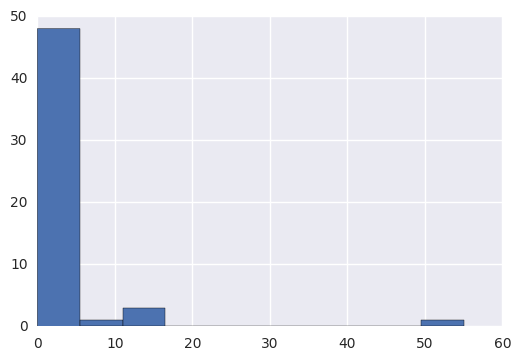

In [148]:
#Visualize the distribution of betweenness
plt.hist(G_b.betweenness())
plt.show()

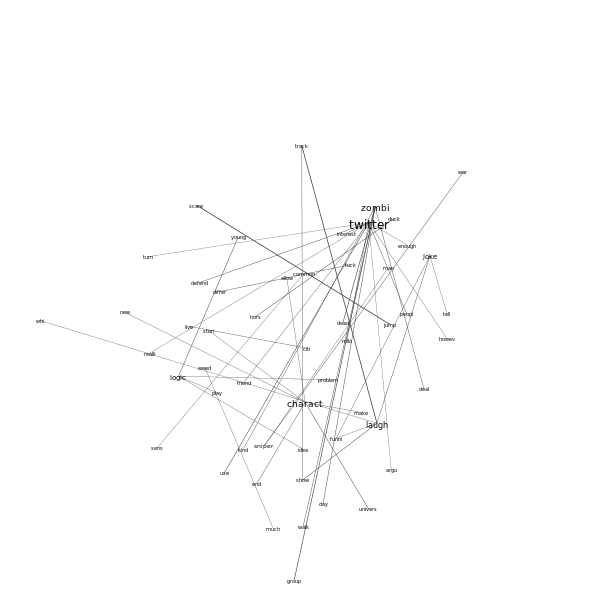

In [149]:
edge_width = (np.array(G_b.es['weight'])*0.1).tolist()
size = (5 + np.sqrt(np.array(G_b.betweenness()))).tolist()
ig.plot(G_b, layout = G.layout_fruchterman_reingold(), vertex_size = 0, vertex_label_size = size, edge_width = edge_width, target = 'data_cmv/c13_b.png')
IPython.display.Image('data_cmv/c13_b.png')

In [150]:
#What are the top ten words in terms of betweenness
sorted(zip(G_b.vs['name'], G_b.betweenness()), key = lambda x: x[1], reverse = True)[:8]

[('twitter', 55.0),
 ('charact', 15.0),
 ('zombi', 15.0),
 ('laugh', 11.0),
 ('logic', 6.0),
 ('joke', 5.0),
 ('sniper', 1.0),
 ('allow', 0.0)]

In [151]:
#What are words further down (the lowest all have centralities of 0
sorted(zip(G_b.vs['name'], G_b.betweenness()), key = lambda x: x[1], reverse = True)[-10:]

[('tell', 0.0),
 ('track', 0.0),
 ('turn', 0.0),
 ('univers', 0.0),
 ('use', 0.0),
 ('walk', 0.0),
 ('war', 0.0),
 ('weed', 0.0),
 ('whi', 0.0),
 ('young', 0.0)]

### Degree centrality: 
the number of connections possessed by each node.

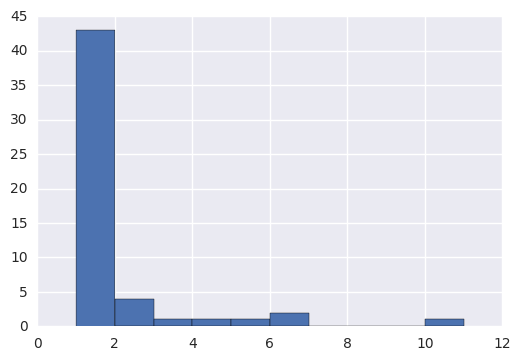

In [152]:
#Distribution of degree
plt.hist(G_b.degree())
plt.show()

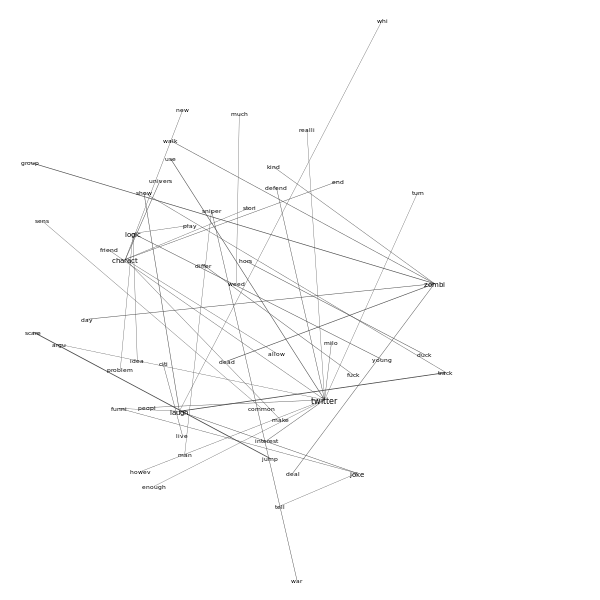

In [153]:
edge_width = (np.array(G_b.es['weight'])*0.1).tolist()
size = (5 + np.sqrt(np.array(G_b.degree()))).tolist()
ig.plot(G_b, layout = G.layout_fruchterman_reingold(), vertex_size = 0, vertex_label_size = size, edge_width = edge_width, target = 'data_cmv/c13_dc.png')
IPython.display.Image('data_cmv/c13_dc.png')

In [154]:
#Top 10 words with highest degree centrality
sorted(zip(G_b.vs['name'], G_b.degree()), key = lambda x: x[1], reverse = True)[:10]

[('twitter', 11),
 ('charact', 6),
 ('zombi', 6),
 ('laugh', 5),
 ('logic', 4),
 ('joke', 3),
 ('funni', 2),
 ('show', 2),
 ('sniper', 2),
 ('track', 2)]

In [155]:
#Bottom 10 words with lowest degree centrality
sorted(zip(G_b.vs['name'], G_b.degree()), key = lambda x: x[1], reverse = False)[:10]

[('allow', 1),
 ('argu', 1),
 ('citi', 1),
 ('common', 1),
 ('day', 1),
 ('dead', 1),
 ('deal', 1),
 ('defend', 1),
 ('differ', 1),
 ('duck', 1)]